# **Modelling and Evaluation C - Benign and Malignant classification of Skin Lesions**

## Objectives

Answer Business requirement 2:
The client wants to be able to know from the photo of a skin lesion if it is a bening or malignant one.

## Inputs
* input/
    * test_set  
      * benign  
      * malignant  
    * train_set  
      * benign  
      * malignant   
    * val_set  
      * benign  
      * malignant 
* image shape embeddings

## Outputs

* Images distribution plot in train, validation, and test set
* Image augmentation
* Class indices to change prediction inference in labels
* Machine learning model creation and training
* Saved model
* Learning curve plot for model performance
* Model evaluation on pickle file
* Prediction on the random image file.

---

### Change working directory

We need to change the working directory from its current folder to its parent folder

* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/carolina/Documents/CodeInstitute/benign-malignant-classification/jupyter_notebooks'

We want to make the parent of the current directory the new current directory

* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory


In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
working_dir = os.getcwd()
working_dir

'/Users/carolina/Documents/CodeInstitute/benign-malignant-classification'

### Import regular packages

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import tensorflow as tf

### Set input directories

Set train, validation and test paths

In [5]:
input_dir = 'input/skin_dataset_resized'
train_path = os.path.join(input_dir, 'train_set')
test_path = os.path.join(input_dir, 'test_set')
validation_path = os.path.join(input_dir, 'val_set')

In [6]:
version = 'v2'
file_path = os.path.join('outputs', version)

if (
    'outputs' in os.listdir(working_dir) and 
    version in os.listdir(os.path.join(working_dir, 'outputs'))
):
    print('This version of the output dataset already exists.')
    pass
else:
    os.makedirs(name=file_path)

This version of the output dataset already exists.


### Set label names

In [7]:
labels = os.listdir(train_path)
print(f'Image labels are: {labels}') 

Image labels are: ['malignant', 'benign']


## Load image shape

### Import saved image shape embedding

In [8]:
import joblib

image_shape = joblib.load(filename=f'outputs/{version}/image_shape.pkl')
image_shape

(176, 235, 3)

## Number of images in train, test and validation data sets and their respective data balance

* train_set - malignant: 4000 images
* train_set - benign: 5200 images
* val_set - malignant: 550 images
* val_set - benign: 550 images
* test_set - malignant: 550 images
* test_set - benign: 550 images


Total dataset balance report:
Label - benign: 6300 images
Label - malignant: 5100 images


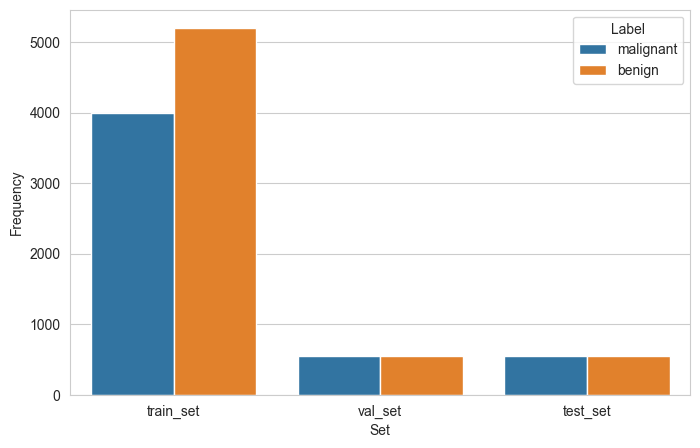

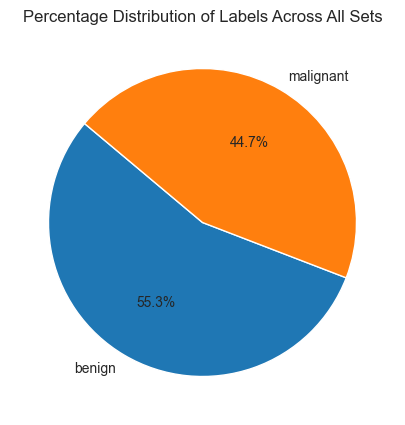

In [9]:
# Initialize an empty DataFrame to store label data
df_freq = pd.DataFrame(columns=['Set', 'Label', 'Frequency'])

for folder in ['train_set', 'val_set', 'test_set']:
    for label in labels:
        label_data = pd.Series({
            'Set': folder,
            'Label': label,
            'Frequency': int(len(os.listdir(os.path.join(input_dir, folder, label))))
        })
        df_freq = df_freq.append(label_data, ignore_index=True)

        print(
            f'* {folder} - {label}: '
            f'{len(os.listdir(os.path.join(input_dir, folder, label)))}'
            f' images')

print("\n")


# Aggregating the frequencies of labels across all sets
total_label_distribution = df_freq.groupby('Label')['Frequency'].sum()


# Creating a report
report = "\n".join(
    ["Total dataset balance report:"] +
    [
        f"Label - {label}: {int(count)} images" 
        for label, count in total_label_distribution.items()
    ]
)

# Printing the report
print(report)

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

# Create a pie chart
plt.figure(figsize=(8, 5))
total_label_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Labels Across All Sets')
plt.ylabel('')  # Hide the y-label

# Save the pie chart
plt.savefig(os.path.join(
    file_path,
    'label_distribution_across_all_sets.png'), bbox_inches='tight', dpi=150)
plt.show()

---

## Image data augmentation

---

### Import ImageDataGenerator

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

We will then setup the pipeline for the image data generator

In [11]:
from keras.preprocessing.image import ImageDataGenerator
augmentation_data = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    vertical_flip=True,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    brightness_range=[0.5, 1.5],
    shear_range=15,
    fill_mode='nearest',
    rescale=1.0/255.0,
)

### Augmentation of the training image dataset

In [12]:
batch_size = 20
train_set = augmentation_data.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
    )

train_set.class_indices

Found 9200 images belonging to 2 classes.


{'benign': 0, 'malignant': 1}

### Augmentation of the validation image dataset

In [13]:
validation_set = augmentation_data.flow_from_directory(
    validation_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
    )

validation_set.class_indices

Found 1100 images belonging to 2 classes.


{'benign': 0, 'malignant': 1}

### Augmentation of the test image dataset

In [14]:
test_set = augmentation_data.flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
    )

test_set.class_indices

Found 1100 images belonging to 2 classes.


{'benign': 0, 'malignant': 1}

---

### Plot augmented training images

(20, 176, 235, 3)


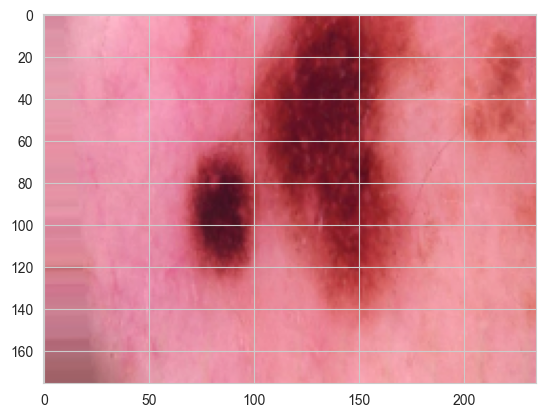

(20, 176, 235, 3)


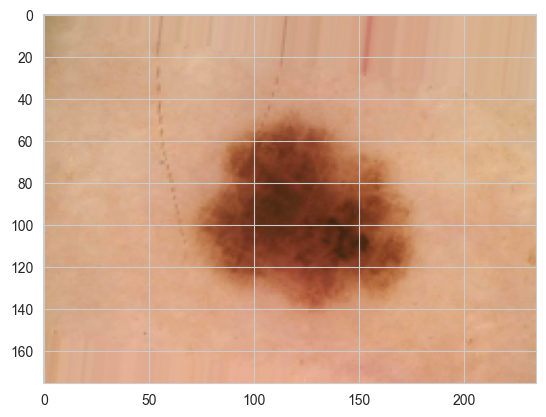

(20, 176, 235, 3)


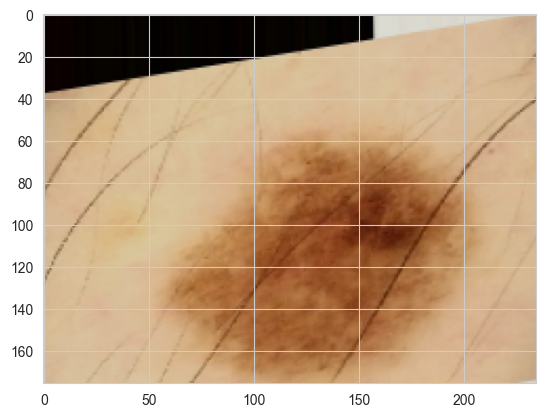

(20, 176, 235, 3)


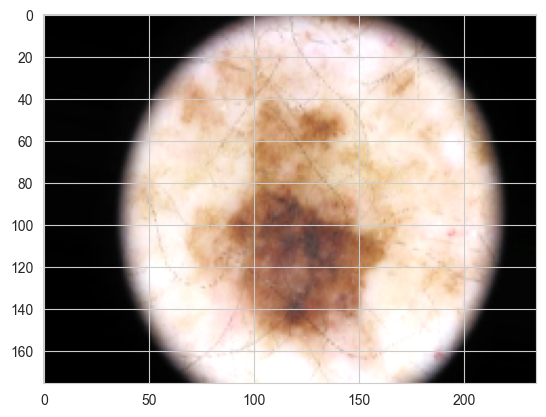

(20, 176, 235, 3)


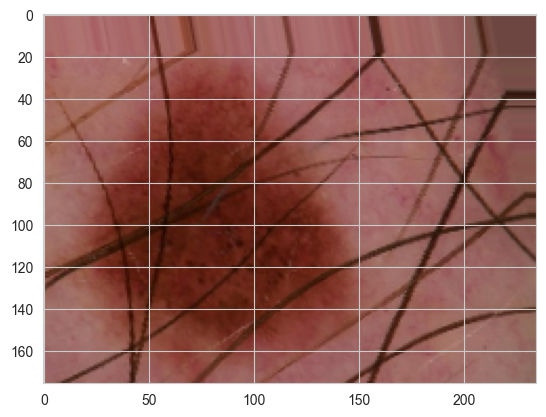

In [15]:
for i in range(5):
    img, label = train_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### Plot augmented validation images

(20, 176, 235, 3)


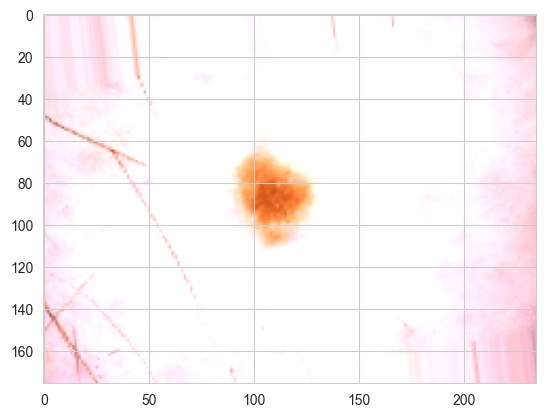

(20, 176, 235, 3)


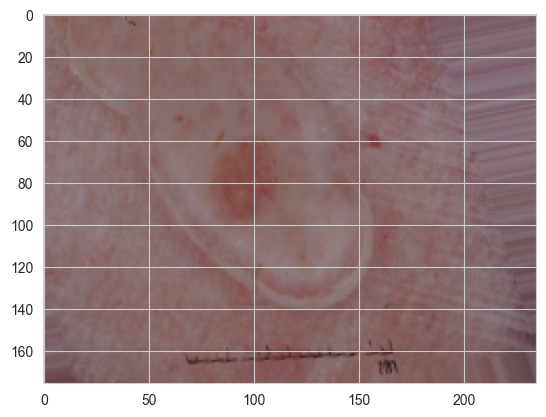

(20, 176, 235, 3)


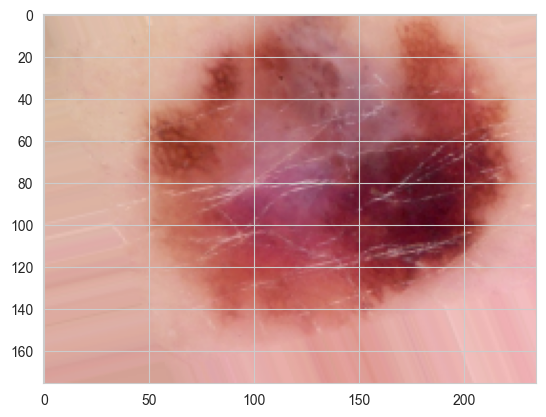

(20, 176, 235, 3)


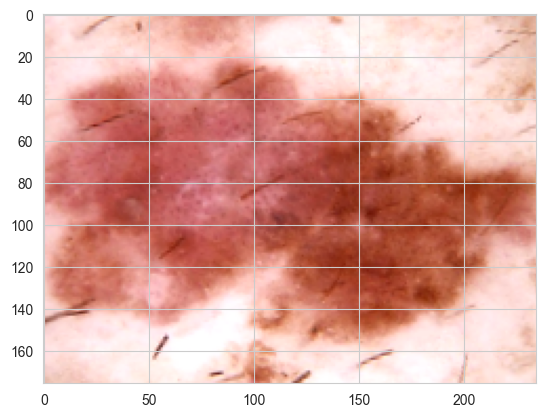

(20, 176, 235, 3)


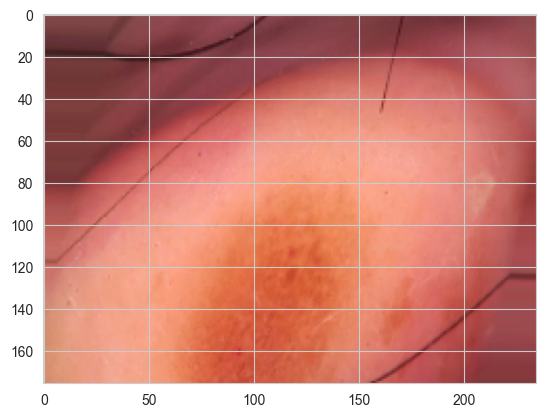

In [16]:
for i in range(5):
    img, label = validation_set.next()
    print(img.shape)
    plt.imshow(img[0])
    plt.show()

### Plot augmented test images

(20, 176, 235, 3)


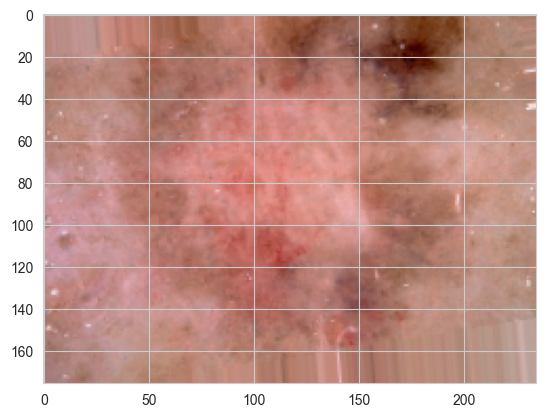

(20, 176, 235, 3)


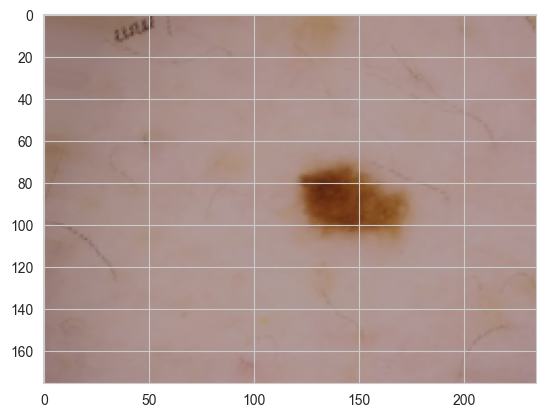

(20, 176, 235, 3)


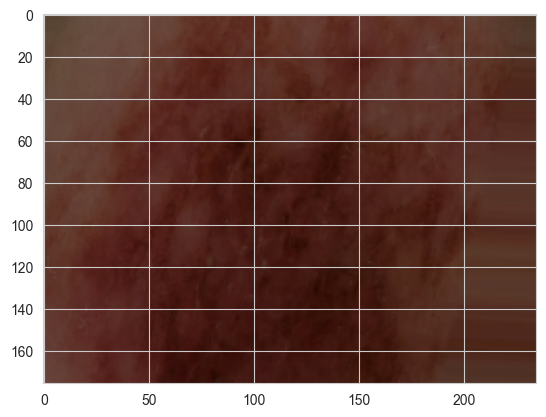

(20, 176, 235, 3)


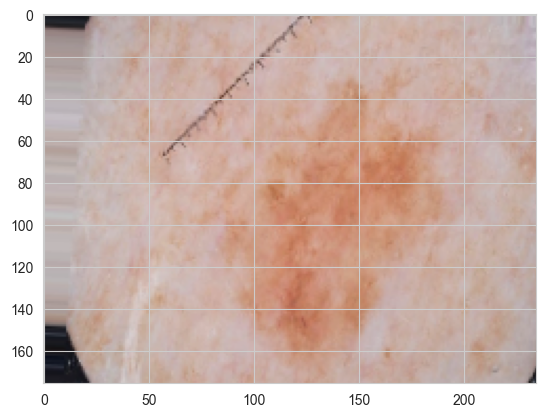

(20, 176, 235, 3)


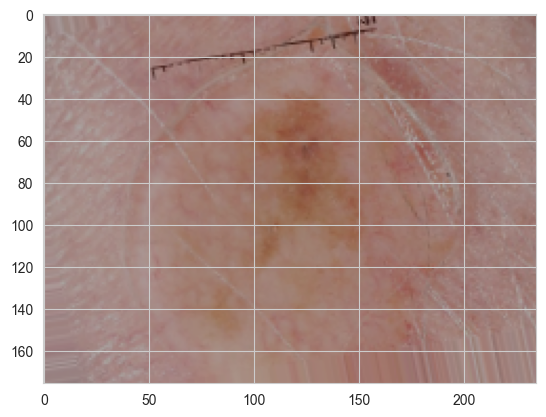

In [17]:
for i in range(5):
    img, label = test_set.next()
    print(img.shape) 
    plt.imshow(img[0])
    plt.show()

### Save class indices

In [18]:
joblib.dump(value=train_set.class_indices,
            filename=f"{file_path}/class_indices.pkl")

['outputs/v2/class_indices.pkl']

## Model Creation

### Import model packages

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from keras.optimizers.legacy import Adam  # Import legacy optimizer for M1/M2 Mac compatibility
from keras_tuner import HyperParameters, Hyperband

### Model

In [20]:
def build_model(hp: HyperParameters):
    '''
    Build model with hyperparameters.
    Parameters
    ----------
    hp : HyperParameters
        HyperParameters object.
    Returns
    -------
    model : Sequential
        Tensorflow Keras Sequential model.
    '''
    
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=image_shape, activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    hp_units = hp.Int('units', min_value=64, max_value=512, step=64)
    model.add(Dense(units=hp_units, activation='relu'))

    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    opt = Adam(learning_rate=hp_learning_rate)

    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),  # Use legacy Adam
              loss='binary_crossentropy',
              metrics=['accuracy'])


    return model

### Keras Tuner for hyperparameter tuning

Define the tuner

In [21]:
tuner = Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='skin_lesion_classification'
)

Reloading Tuner from my_dir/skin_lesion_classification/tuner0.json


### Start the Search

Use the tuner to search for the best hyperparameters

In [22]:
# Start tuning
tuner.search(
    train_set,
    epochs=10,
    steps_per_epoch=train_set.samples // batch_size,
    validation_data=validation_set,
    validation_steps=validation_set.samples // batch_size
)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Print a summary of the best model
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 174, 233, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 87, 116, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 114, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 42, 57, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 40, 55, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 27, 128)       0

### Early stopping

In [23]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

### Implementing Class Weights from Keras for the balancing of the dataset

In [24]:
from sklearn.utils import class_weight
import numpy as np

# Calculate class weights as sample weights
sample_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=train_set.classes
)

# Convert sample weights to class weights if needed
unique_classes = np.unique(train_set.classes)
class_weights = {cls: sample_weights[train_set.classes == cls].mean() for cls in unique_classes}

# class_weights is now a dictionary mapping class indices to their weights
class_weights_dict = dict(enumerate(class_weights.values()))


### Fit model for training

In [50]:
history = best_model.fit(train_set,
          epochs=15,
          steps_per_epoch=len(train_set.classes) // batch_size,
          validation_data=validation_set,
          callbacks=[early_stop],
          verbose=1) 

Epoch 1/15
460/460 [==============================] - 127s 276ms/step - loss: 0.2392 - accuracy: 0.9074 - val_loss: 0.2978 - val_accuracy: 0.8755
Epoch 2/15
460/460 [==============================] - 126s 274ms/step - loss: 0.2382 - accuracy: 0.9090 - val_loss: 0.3297 - val_accuracy: 0.8445
Epoch 3/15
460/460 [==============================] - 127s 276ms/step - loss: 0.2352 - accuracy: 0.9107 - val_loss: 0.2964 - val_accuracy: 0.8673
Epoch 4/15
460/460 [==============================] - 127s 275ms/step - loss: 0.2409 - accuracy: 0.9062 - val_loss: 0.2570 - val_accuracy: 0.8991
Epoch 5/15
460/460 [==============================] - 127s 276ms/step - loss: 0.2296 - accuracy: 0.9101 - val_loss: 0.2554 - val_accuracy: 0.9091
Epoch 6/15
460/460 [==============================] - 127s 276ms/step - loss: 0.2327 - accuracy: 0.9109 - val_loss: 0.2507 - val_accuracy: 0.9036
Epoch 7/15
460/460 [==============================] - 127s 276ms/step - loss: 0.2321 - accuracy: 0.9116 - val_loss: 0.3307 -

### Save model

In [51]:
best_model.save('outputs/v2/skin_lesion_classifier_model.h5')

/opt/homebrew/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model learning curve

<Figure size 1000x600 with 0 Axes>

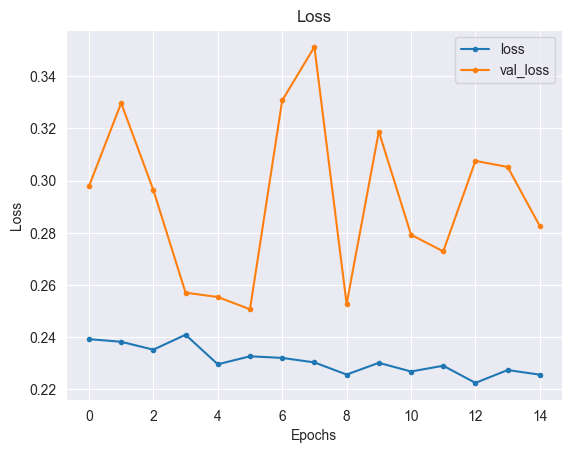

<Figure size 1000x600 with 0 Axes>

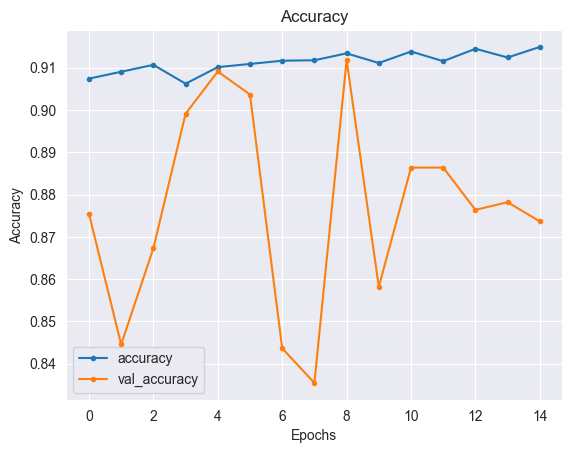

In [52]:
# Now, using the history object to create a DataFrame
losses = pd.DataFrame(history.history)

# Setting the style for the plots
sns.set_style("darkgrid")

# Plotting the loss for training and validation
plt.figure(figsize=(10, 6))
losses[['loss', 'val_loss']].plot(style='.-')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.savefig(f'{file_path}/model_training_losses.png', bbox_inches='tight', dpi=150)
plt.show()

# Plotting the accuracy for training and validation
plt.figure(figsize=(10, 6))
losses[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.savefig(f'{file_path}/model_training_acc.png', bbox_inches='tight', dpi=150)
plt.show()

## Model Evaluation

### Import saved model

In [53]:
from keras.models import load_model
model = load_model('outputs/v2/skin_lesion_classifier_model.h5')

### Confusion Matrix

55/55 [==============================] - 8s 135ms/step
[[377 173]
 [392 158]]
              precision    recall  f1-score   support

   malignant       0.49      0.69      0.57       550
      benign       0.48      0.29      0.36       550

    accuracy                           0.49      1100
   macro avg       0.48      0.49      0.47      1100
weighted avg       0.48      0.49      0.47      1100



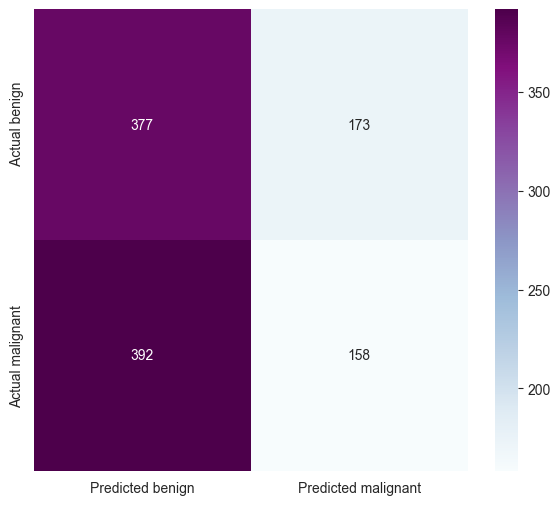

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
pred = model.predict(test_set)
y_pred = np.concatenate(np.round(pred).astype(int))
target_names = labels
confusion_matrix = confusion_matrix(test_set.classes, y_pred)
print(confusion_matrix)
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix,
            annot=True,
            fmt='g',
            cmap='BuPu',
            xticklabels=['Predicted benign', 'Predicted malignant'],
            yticklabels=[' Actual benign', 'Actual malignant'],)
plt.savefig(f'{file_path}/confusion_matrix.png', bbox_inches='tight', dpi=150)
print(classification_report(test_set.classes, y_pred,
      target_names=target_names))

### Evaluate model on test set

In [47]:
evaluation = model.evaluate(test_set, batch_size=batch_size)
print("Model accuracy: " + "{:.2f}%".format(evaluation[1] * 100))
print("Model Loss: " + str(evaluation[0]))

55/55 [==============================] - 8s 145ms/step - loss: 0.5599 - accuracy: 0.6936
Model accuracy: 69.36%
Model Loss: 0.5599437355995178


### Save evaluation PKL

In [41]:
joblib.dump(value=evaluation,
            filename=f"outputs/v2/evaluation.pkl")

['outputs/v2/evaluation.pkl']

## Predict on new data

Load a random image as PIL

Image shape: (235, 176), Image mode: RGB


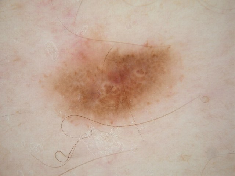

In [42]:
from tensorflow.keras.preprocessing import image
import os

pointer = 39
label = labels[0]

image_path = os.path.join(
    test_path, label, os.listdir(os.path.join(test_path, label))[pointer])

pil_image = image.load_img(image_path,
                           target_size=image_shape, color_mode='rgb')
print(f'Image shape: {pil_image.size}, Image mode: {pil_image.mode}')
pil_image

Convert image to array and prepare for prediction

In [43]:
my_image = image.img_to_array(pil_image)
my_image = np.expand_dims(my_image, axis=0)/255
print(my_image.shape)

(1, 176, 235, 3)


Predict class probabilities

In [44]:
pred_proba = model.predict(my_image)[0, 0]

target_map = {v: k for k, v in train_set.class_indices.items()}
pred_class = target_map[pred_proba > 0.5]

if pred_class == target_map[0]:
    pred_proba = 1 - pred_proba

print(pred_proba)
print(pred_class)

1/1 [==============================] - 0s 52ms/step
0.5070076
malignant
